In [3]:
import Pkg; Pkg.activate("../../"); Pkg.test()

 Activating environment at `/mnt/geda00/nemec/BachelorThesis/Project.toml`


In [17]:
using MaGeSigGen, MaGe, StatsBase, Plots

In [14]:
dir = realpath(joinpath(dirname(pathof(MaGeSigGen)), "..", "runs", "09-23-siggen2"))

event_dir = "/mnt/e15/comellato/results4Paul/GWD6022_Co56_side50cm/DM"
event_paths = filter(p -> occursin(r".root.hits$", p), readdir(event_dir, join=true))
signal_paths = map(
    p -> joinpath(dir, "signals", split(splitdir(p)[end], '.')[1] * "_signals.jld"),
    event_paths
)

2001-element Array{String,1}:
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0001_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0002_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0003_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0004_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0005_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0006_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0007_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0008_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen2/signals/GWD6022_Co56_side50cm_0009_signals.jld"
 "/mnt/geda00/nemec/BachelorThesis/runs/09-23-siggen

In [15]:
function appendrawAoEhist!(hist, event_path::AbstractString, signal_path::AbstractString)
    sgnls = load_signals(SignalDict, signal_path)

    for event in MaGe.loadstreaming(event_path)
        if !ismissing(sgnls[event])
            E = energy(event)
            push!(hist, (E, getA(sgnls[event]) / E))
        end
    end

    hist
end

appendrawAoEhist! (generic function with 1 method)

In [16]:
sgnls1 = load_signals(SignalDict, signal_paths[1])

SignalDict(Dict{Int64,Array{Float32,1}}(418540 => [0.011257649, 0.036257505, 0.061195802, 0.08621328, 0.11106645, 0.13624921, 0.16112784, 0.18566187, 0.21045141, 0.23563801  …  1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607, 1771.3607],878460 => [0.076448575, 0.2463514, 0.4164186, 0.5867544, 0.75678074, 0.9271127, 1.0976584, 1.2655581, 1.4291977, 1.5883017  …  2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866, 2231.4866],51706 => [0.0934597, 0.3010261, 0.5084963, 0.71584684, 0.9231779, 1.1304561, 1.3378493, 1.5451604, 1.7523861, 1.9595032  …  1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114, 1238.3114],11851 => [0.01183101, 0.038140938, 0.06461875, 0.0912024, 0.11764101, 0.14389822, 0.1703593, 0.19695656, 0.22335704, 0.24988621  …  1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799, 1558.7799],

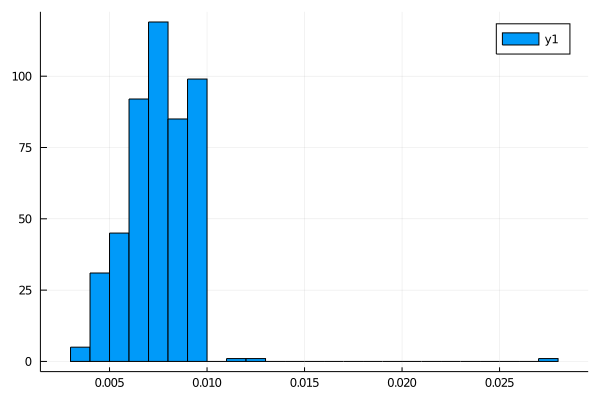

In [19]:
histogram(map(s -> getA(s) / s[end], sgnls1))

In [23]:
function appendrawAoEhist!(hist, event_paths::Vector{String}, signal_paths::Vector{String})
    for (ep, sp) in zip(event_paths, signal_paths)
        appendrawAoEhist!(hist, ep, sp)
    end
    
    hist
end

appendrawAoEhist! (generic function with 2 methods)

In [30]:
h = Histogram((1000:2.5:4000, 0:0.0005:0.05))

Histogram{Int64,2,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  1000.0:2.5:4000.0
  0.0:0.0005:0.05
weights: [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
closed: left
isdensity: false

In [31]:
appendrawAoEhist!(h, event_paths[1:500], signal_paths[1:500])

Histogram{Int64,2,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  1000.0:2.5:4000.0
  0.0:0.0005:0.05
weights: [0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0]
closed: left
isdensity: false

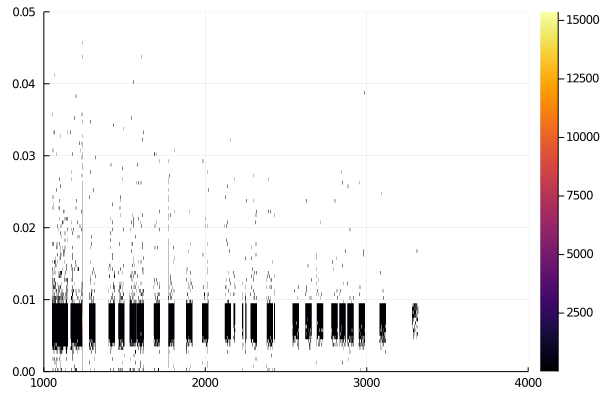

In [41]:
plot(h)

In [104]:
function get_weights(hist::Histogram, p1::Tuple, p2::Tuple)
    i1 = StatsBase.binindex(hist, p1)
    i2 = StatsBase.binindex(hist, p2)
    
    return hist.weights[map(((b, e),) -> b:e-1, zip(i1, i2))...]
end

import Base: getindex
function getindex(hist::Histogram, ranges...)
    i1 = StatsBase.binindex(hist, tuple((r[begin] for r in ranges)...))
    i2 = StatsBase.binindex(hist, tuple((r[end] for r in ranges)...))
    ix_rs = [b:e-1 for (b, e) in zip(i1, i2)]
    edges = tuple((e[r[begin]:r[end]+1] for (e, r) in zip(hist.edges, ix_rs))...)
    weights = hist.weights[ix_rs...]
    return Histogram(edges, weights, hist.closed, hist.isdensity)
end

getindex (generic function with 376 methods)

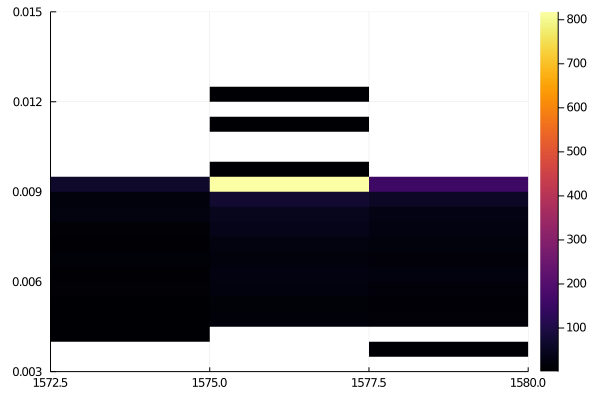

In [106]:
plot(h[1572.5:2.5:1580, 0.003:0.0005:0.015])

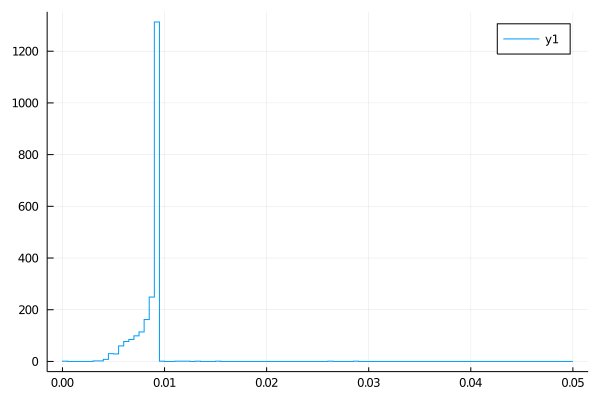

In [99]:
hist1 = Histogram(0:0.0005:0.05, vec(sum(h[1570:1585, 0:0.005:0.05].weights, dims=1)))
plot(hist1, seriestype=:step)

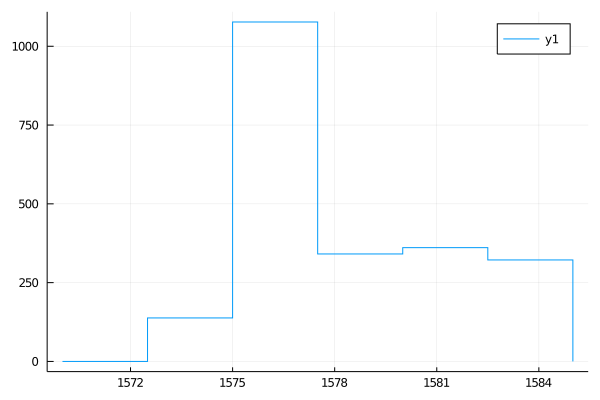

In [102]:
ehist1 = Histogram(1570:2.5:1585, vec(sum(h[1570:1585, 0:0.005:0.05].weights, dims=2)))
plot(ehist1, seriestype=:step)